In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import pandas as pd
import csv
import json
import scipy.stats as stats
import pylab as pl
import statsmodels.api as sm
import seaborn as sns
import statistics
from scipy.stats import entropy
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
import random
from sklearn import preprocessing
from scipy.stats import skew

In [2]:
# Read and print .json file
df = pd.read_json('/Users/bryankumara/Downloads/yelp_academic_dataset_business.json',lines=True)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [3]:
# Filter dataset to show only McDonald's across North America
df = df[(df.city != "Edinburgh") & (df.name == "McDonald's")] 
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
218,ZaMMUcOIngBCgxuKxFzfqg,McDonald's,1524 Georgesville Rd,Columbus,OH,43228,39.919976,-83.125822,2.0,25,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Fast Food, Restaurants, Food, Coffee & Tea, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,5017 Hwy 290 W,Austin,TX,78735,30.232133,-97.823183,1.5,9,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Restaurants, Coffee & Tea, Food, Burgers, Fast...","{'Monday': '7:0-22:30', 'Tuesday': '7:0-22:30'..."
349,aoH2NWs312ES--8bJTDJEw,McDonald's,127 Broadway,Saugus,MA,01906,42.495702,-71.016722,3.0,27,1,"{'RestaurantsReservations': 'False', 'GoodForK...","Coffee & Tea, Fast Food, Restaurants, Food, Bu...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
449,Dz3GF5EvC3kzM-Jf_nLCDw,McDonald's,12109 NE Glisan St,Portland,OR,97220,45.526686,-122.538261,1.5,37,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Coffee & Tea, Restaurants, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
483,E4ejoHJHIOvVhkca3kWRuQ,McDonald's,2875 SE Powell Blvd,Portland,OR,97202,45.497746,-122.636072,2.0,77,1,"{'NoiseLevel': 'u'average'', 'BusinessAcceptsC...","Food, Fast Food, Restaurants, Coffee & Tea, Bu...","{'Monday': '5:0-1:0', 'Tuesday': '5:0-1:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159823,ieIMK7tAq9GuqQRzqM-xZA,McDonald's,180 Endicott St,Danvers,MA,01923,42.547904,-70.941543,2.5,20,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Burgers, Coffee & Tea, Restaurants, Food, Fast...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
159931,078eaXgiwUiJRYezr1EFoA,McDonald's,5090 Groveport Rd,Obetz,OH,43207,39.868639,-82.935581,2.0,10,1,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Food, Fast Food, Coffee & Tea, Burgers, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
159957,LN_ssD4Fb7Y5SVcMRDd6oQ,McDonald's,1200 Lynn Valley Road,North Vancouver,BC,V7J 2A2,49.335963,-123.040953,1.5,9,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Fast Food, Burgers, Coffee & Tea,...","{'Monday': '4:30-0:0', 'Tuesday': '4:30-0:0', ..."
160241,W1Oaq9zBBAXf_eIIVjmpzg,McDonald's,912 Mlk Jr Dr,Atlanta,GA,30314,33.754266,-84.417213,1.0,8,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Coffee & Tea, Restaurants, Fast Food, Food, Bu...","{'Monday': '5:30-0:0', 'Tuesday': '5:30-0:0', ..."


In [4]:
# Gather relevant business ID
x = df["business_id"]
x

218       ZaMMUcOIngBCgxuKxFzfqg
253       Ieelu69Y23nbjKG3OGfwnw
349       aoH2NWs312ES--8bJTDJEw
449       Dz3GF5EvC3kzM-Jf_nLCDw
483       E4ejoHJHIOvVhkca3kWRuQ
                   ...          
159823    ieIMK7tAq9GuqQRzqM-xZA
159931    078eaXgiwUiJRYezr1EFoA
159957    LN_ssD4Fb7Y5SVcMRDd6oQ
160241    W1Oaq9zBBAXf_eIIVjmpzg
160292    kacR2t7LkUdM62DvpSLhrw
Name: business_id, Length: 525, dtype: object

In [5]:
# Create a list of McDonald's ratings across North America
y = df["stars"]
y

218       2.0
253       1.5
349       3.0
449       1.5
483       2.0
         ... 
159823    2.5
159931    2.0
159957    1.5
160241    1.0
160292    1.0
Name: stars, Length: 525, dtype: float64

In [6]:
# Converted list to array
star_list = y.to_numpy()
star_list

array([2. , 1.5, 3. , 1.5, 2. , 2. , 2.5, 2. , 2.5, 1.5, 2.5, 2. , 2. ,
       1. , 1.5, 2.5, 1.5, 2. , 1. , 3. , 2.5, 2.5, 2.5, 2. , 2. , 1.5,
       1.5, 1.5, 1.5, 2. , 1.5, 1.5, 1.5, 1.5, 2. , 1. , 2. , 2.5, 2. ,
       2. , 2.5, 2. , 2. , 2. , 3.5, 2. , 2. , 1.5, 1.5, 2.5, 2.5, 1.5,
       1.5, 1.5, 2. , 1.5, 3. , 2. , 1.5, 1.5, 1.5, 2.5, 2. , 1. , 1.5,
       1.5, 2. , 1. , 2. , 1.5, 1.5, 2.5, 1.5, 2. , 1. , 2. , 2. , 1.5,
       1.5, 2.5, 1.5, 2. , 2. , 3. , 2. , 1.5, 1. , 2.5, 1.5, 3. , 3. ,
       2. , 2. , 2. , 1.5, 3. , 2.5, 2. , 1.5, 2.5, 1.5, 1.5, 2. , 1.5,
       2. , 1.5, 2. , 3. , 2. , 1. , 1.5, 1.5, 2. , 2. , 1.5, 1.5, 2. ,
       2. , 1. , 1.5, 1. , 3. , 2.5, 2.5, 2.5, 1.5, 1.5, 1. , 2.5, 1.5,
       2. , 2. , 1.5, 2.5, 2.5, 3. , 2. , 2. , 3. , 2. , 2. , 2. , 1.5,
       3.5, 2.5, 1. , 2. , 1. , 3. , 2.5, 1.5, 3. , 1.5, 2. , 2. , 1.5,
       2. , 2.5, 1.5, 1.5, 2.5, 1.5, 2. , 1. , 2.5, 2.5, 2. , 2.5, 2. ,
       3. , 3. , 1.5, 2. , 2.5, 3. , 1. , 3. , 3. , 2.5, 1. , 1.

In [7]:
# Find average rating
avg_stars = sum(y)/len(y)
avg_stars

1.96

In [8]:
# Find the skew of the ratings
y.skew()

0.4053720283474719

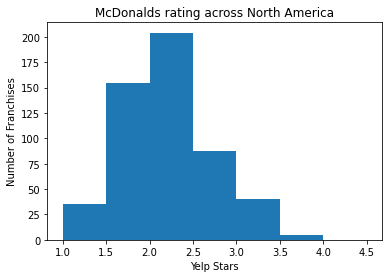

In [9]:
# Plot rating distribution
H = pl.hist(y,bins=[1,1.5,2,2.5,3,3.5,4,4.5])     
plt.xlabel('Yelp Stars')
plt.ylabel('Number of Franchises')
plt.title('McDonalds rating across North America')
pl.show()                  

In [10]:
# Shapiro Test at alpha 5%
from scipy.stats import shapiro
# normality test
stat, p = shapiro(star_list)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.909, p=0.000
Sample does not look Gaussian (reject H0)


In [11]:
# Shapiro Test at alpha 1%
from scipy.stats import shapiro
# normality test
stat, p = shapiro(star_list)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.909, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
# D'Agostino and Pearson's Test at alpha 5%
from scipy.stats import normaltest
stat, p = normaltest(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=13.684, p=0.001
Sample does not look Gaussian (reject H0)


In [13]:
# D'Agostino and Pearson's Test at alpha 1%
from scipy.stats import normaltest
stat, p = normaltest(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=13.684, p=0.001
Sample does not look Gaussian (reject H0)


In [14]:
# Anderson-Darling Test at alpha 5%
from scipy.stats import anderson
result = anderson(y)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 21.659
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.781, data does not look normal (reject H0)
2.500: 0.911, data does not look normal (reject H0)
1.000: 1.084, data does not look normal (reject H0)


In [15]:
# Anderson-Darling Test at alpha 1%
from scipy.stats import anderson
result = anderson(y)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 21.659
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.781, data does not look normal (reject H0)
2.500: 0.911, data does not look normal (reject H0)
1.000: 1.084, data does not look normal (reject H0)


In [74]:
# number of sample
num = [1, 10, 50, 100,150,200,250,300,350,400,450,500,525] 
# list of sample means
means = [] 
 
for j in num:
    x = np.mean(
        random.choices(
            star_list, k= j))
    means.append(x)
means

[2.5,
 1.85,
 1.9,
 1.995,
 1.9866666666666666,
 1.88,
 1.912,
 1.91,
 1.95,
 1.90375,
 1.9722222222222223,
 1.951,
 1.9647619047619047]

Text(0.5, 1.0, 'Rating Convergence')

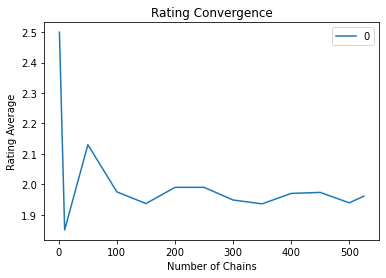

In [115]:
# Plot ratings convergence for Central Limit Theorem
newPlot = pd.DataFrame(means, index=num)
newPlot.plot()
plt.xlabel('Number of Chains')
plt.ylabel('Rating Average')
plt.title('Rating Convergence')

In [13]:
# Kurtosis of ratings
y.kurtosis()

-0.04598416715628817

In [44]:
new = normalize(star_list,0,1)

In [45]:
# Find entropy of normalized dataset
stats.entropy(new)

6.090738426209817

In [51]:
first = np.random.choice(star_list, replace = False, size = 1)
ten = np.random.choice(star_list, replace = False, size = 10)
fifty = np.random.choice(star_list, replace = False, size = 50)
hundred = np.random.choice(star_list, replace = False, size = 100)
onefifty = np.random.choice(star_list, replace = False, size = 150)
twohundred = np.random.choice(star_list, replace = False, size = 200)
twofifty = np.random.choice(star_list, replace = False, size = 250)
threehundred = np.random.choice(star_list, replace = False, size = 300)
threefifty= np.random.choice(star_list, replace = False, size = 350)
fourhundredv = np.random.choice(star_list, replace = False, size = 400)
fourfifty = np.random.choice(star_list, replace = False, size = 450)
fivehundred = np.random.choice(star_list, replace = False, size = 500)
totals = np.random.choice(star_list, replace = False, size = 525)

In [70]:
np.var(totals)

0.277447619047619

In [72]:
var = [0,0.11,0.21,0.29475,0.26023,0.2451,0.282516,0.2766972,0.2773387744102041,0.2812109375,0.27442098765432105,0.275236
,0.277447619047619]

Text(0.5, 1.0, 'Variance')

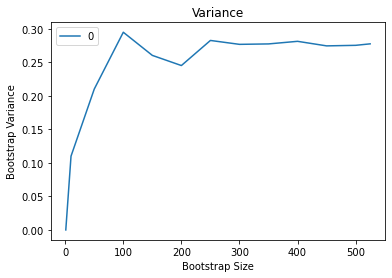

In [76]:
# Plot bootstrapped variance estimator
newPlot = pd.DataFrame(var, index=num)
newPlot.plot()
plt.xlabel('Bootstrap Size')
plt.ylabel('Bootstrap Variance')
plt.title('Variance')